# 1. Introduction

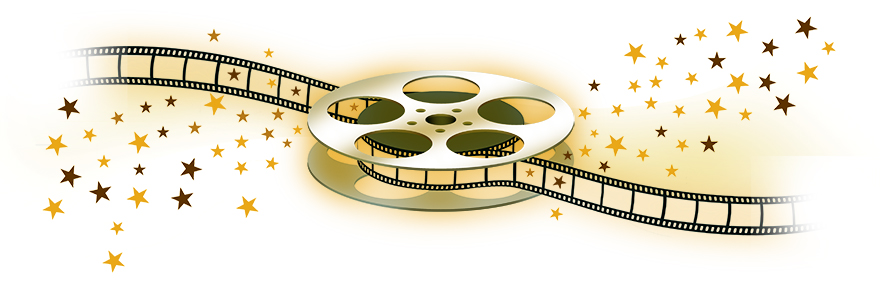

*Team Members*: Khuliso Muleka, Mariri Asere, John Mohale, Bhalisa Sodo, Kiren Sewnath

**The project workflow is listed below:**


    The project workflow is listed below:


        1. Introduction
        2. Comet
        3. Import Libraries
        4. Importing Dataset
        5. Data Preprocessing and Data Cleaning
        6. Exploratory Data Analysis
        7.Advanced Preprocessing
        8. Model Selection
        9. Model Evaluation 
        10. Submission
        11. Conclusion

<a id="intro"></a>
## 1. Introduction  
Recommender systems in the AI world are used often to remove the element of indecisiveness that many users face when it comes to making decisions. From helping users select their next movie to watch, next book to read, or even the next person they date! Some examples of companies that use recommender systems include: Amazon, Netflix, Youtube and Tinder. 

Types of recommender systems include content-based filtering and collaborative  filtering.

#### Content-based filtering
Content-based filtering uses the qualities of an item to recommend other items similar to what the user has liked before [1].
It is limited by the fact that it needs data about the users preferences to make accurate predictions.

#### Collaborative filtering

Collaborative filtering incorporates a strategy whereby the similarities between users is utilized to generate predictons [2]. Recommender systems collect user information such as which products a user viewed, searched for, purchased etc. The system then uses this information to generate predictions. A common problem with collaborative filtering is that it does not handle 'fresh' users well. This is called the 'cold start' problem [3].

#### Hybrid systems

A combination of both content-based recommender systems and collaborative filtering systems is called a hybrid system.

### Problem Statement
Construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

# 2.Comet

In [1]:
from comet_ml import Experiment

In [2]:
# Run to allow Comet to log the parameters of the models and output of cells.
experiment = Experiment(api_key="IhU59u50KoEBNzeODu6B6GVNX",
                        project_name="Unsupervised_Team_AE6",
                        workspace="bhalisa")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bhalisa/unsupervised-team-ae6/97344ec0cdef490bb67c89575ce9e27f



# 3.Import Libraries

In [1]:
# Data processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Visualization
# import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

# Data Preprocessing
import random
from time import time
# import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
# # from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# from wordcloud import WordCloud, STOPWORDS

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise.model_selection import train_test_split


# Performance evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from surprise import accuracy
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Saving models
import pickle

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")


# 4.Importing datasets

In [2]:
# # Load the train and test datasets
# df_sample_submission = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/sample_submission.csv')
# df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/movies.csv')
# df_imdb= pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/imdb_data.csv')
# df_genome_scores = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_scores.csv')
# df_genome_tags= pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/genome_tags.csv')
# df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/train.csv')
# df_ratings =pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/.csv'ratings)
# df_test= pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/test.csv')
# df_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/tags.csv')
# df_links = pd.read_csv('/kaggle/input/edsa-movie-recommendation-challenge/links.csv')

In [3]:
# Load the train and test datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#Import movie datasets
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
dd_ratings = pd.read_csv('ratings.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

# sample submission
#df_sample_submission = pd.read_csv('sample_submission.csv')

# 4. Data Pre-processing and Cleaning


**Exploring The Dataset**

We look at some of the entries in each dataset to get an idea of the dataframes and the information they contain:

In [29]:
#explore the datasets
df_train.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [30]:
df_test.head(2)

,userId,movieId
0,1,2011
1,1,4144


In [31]:
df_movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [37]:
df_imdb.head(2) 

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


In [39]:
df_genome_scores.head(2)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


In [40]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [41]:
df_tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [36]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Check for missing values**

In [11]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [17]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [18]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [19]:
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [20]:
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [24]:
#Tags
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [32]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

**Explore Datasets Shape**

This will give us an idea of the scale of each dataset. Note that some have over 5 million rows.

In [33]:
#Print out the Shape of the Dataset
print('Shape of Train Dataset:',df_train.shape)
print('Shape of Test Dataset:',df_test.shape)
print('Shape of Movies Dataset:', df_movies.shape)
print ('Shape of imdb Dataset:', df_imdb.shape) 
print ('Shape of genome_scores Dataset:', df_genome_scores.shape)
print ('Shape of genome_tags Dataset:', df_genome_tags.shape)
print ('Shape of tags Dataset:', df_tags.shape) 
print ('Shape of links Dataset:', df_links.shape) 


Shape of Train Dataset: (10000038, 4)
Shape of Test Dataset: (5000019, 2)
Shape of Movies Dataset: (62423, 3)
Shape of imdb Dataset: (27278, 6)
Shape of genome_scores Dataset: (15584448, 3)
Shape of genome_tags Dataset: (1128, 2)
Shape of tags Dataset: (1093360, 4)
Shape of links Dataset: (62423, 3)


## 6.Exploratory Data Analysis

### 6.1 Most Popular Movie Genres

We take a look at some of the genres in the movies database, and the number of ratings for each.

<BarContainer object of 19 artists>

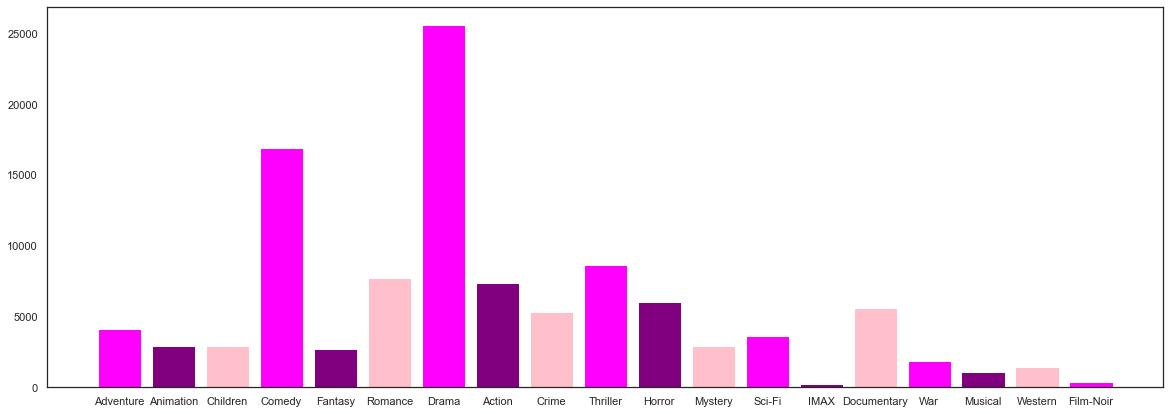

In [14]:
# configure the plot figure size
plt.figure(figsize=(20,7))

# create list of different genres
genre_list = df_movies['genres'].apply(lambda genre_list_movie : str(genre_list_movie).split("|"))
genres_count = {}

# create genre count dictionary
for genre_list_movie in genre_list:
    for genre in genre_list_movie:
        if(genres_count.get(genre,False)):
            genres_count[genre]=genres_count[genre]+1
        else:
            genres_count[genre] = 1       
genres_count.pop("(no genres listed)")

# bar chart to display most watched movie genres
plt.bar(genres_count.keys(),genres_count.values())

The average rating for the top 5 and bottom 5 genres. Interesting that IMAX movies are not so popular.

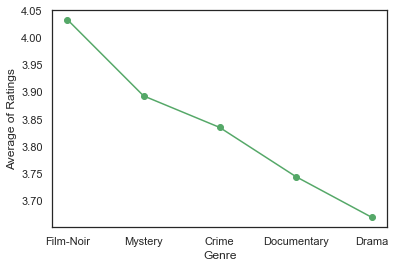

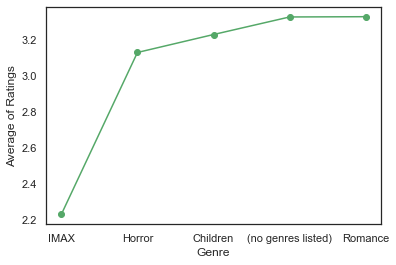

In [6]:
# inner join train and movie datasets
df_merged = pd.merge(df_train, df_movies, on='movieId')

df_merged['genre'] = df_merged['genres'].apply(lambda s:s.split('|')[0])
df_merged['rating'].groupby(df_merged['genre']).mean().sort_values(ascending=False)[:5].plot(xlabel='Genre', ylabel='Average of Ratings', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()

df_merged['rating'].groupby(df_merged['genre']).mean().sort_values(ascending=True)[:5].plot(xlabel='Genre', ylabel='Average of Ratings', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()

### 6.2 Distribution of  user ratings

We get the 20 most active users.

<AxesSubplot:xlabel='UserId', ylabel='Number of Ratings'>

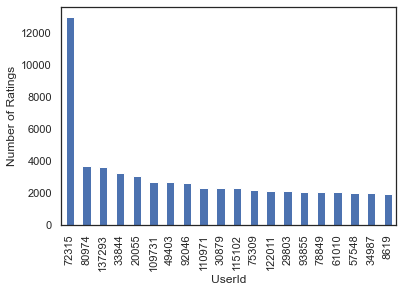

In [4]:
df_train['userId'].value_counts()[:20].plot(xlabel='UserId', ylabel='Number of Ratings', kind='bar')

### 6.3 Number of Ratings by Release Year

We see that a far greater population of movies that were rated are from the 90s, with 1995, 1994, 1999 and 1996 in the lead. Curiously, movies from 1996 have a low mean rating. 

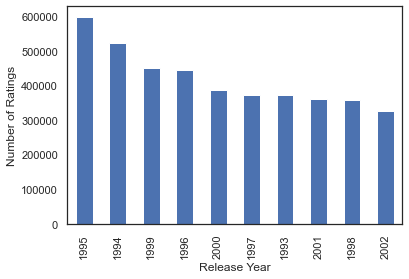

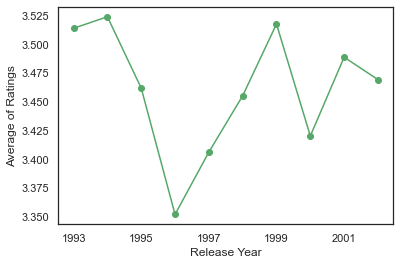

In [7]:
df_merged['year'] = df_merged['title'].str[-5:-1]
df_merged['title'].str[-5:-1].value_counts()[:10].plot(xlabel='Release Year', ylabel='Number of Ratings', kind='bar')
plt.show()

#Plot average rating for the years that were rated the most
df_common_years = df_merged[df_merged['year'].isin(['1995', '1994', '1999', '1996', '2000', '1997', '1993', '2001', '1998', '2002'])]
df_common_years['rating'].groupby(df_common_years['year']).mean()[:10].plot(xlabel='Release Year', ylabel='Average of Ratings', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()

### 6.4 Most rated movies

People really like (or dislike?) The Shawshank Redemption & Forrest Gump. These were rated the most.

<AxesSubplot:xlabel='Movie', ylabel='Number of Ratings'>

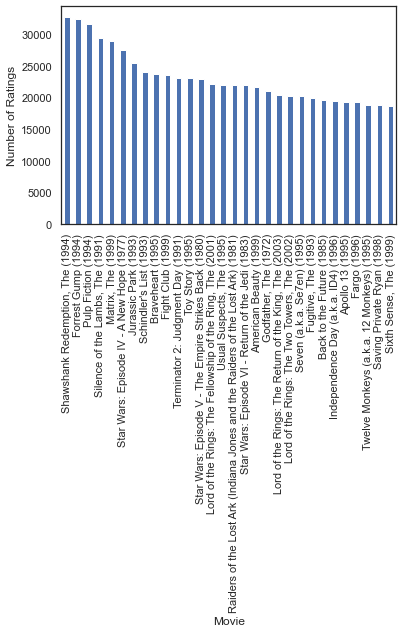

In [8]:
df_merged['title'].value_counts()[:30].plot(xlabel='Movie', ylabel='Number of Ratings', kind='bar')

### 6.5 Ten Highest Rated Movies on Average

In [11]:
# Grouping ratings by movies
ratings_grouped_by_movies = df_merged.groupby('movieId').agg([np.mean], np.size)
ratings_grouped_by_movies.head()

,userId,rating,timestamp
,mean,mean,mean
movieId,,,
1,81254.820137,3.889971,1.153306e+09
2,81263.808266,3.263414,1.117806e+09
3,80285.365983,3.132325,9.826912e+08
4,80994.333678,2.878099,9.383750e+08
5,81837.870912,3.059165,1.008901e+09


In [12]:
# Drop userId column
ratings_grouped_by_movies = df_merged.drop('userId', axis=1)

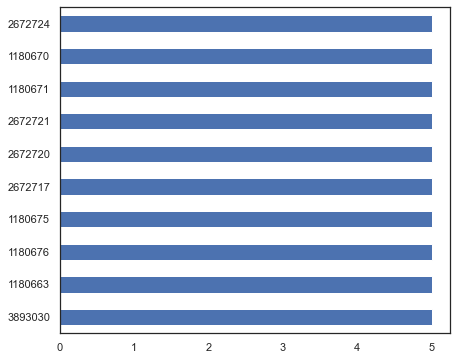

In [13]:
ratings_grouped_by_movies['rating'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6));

### 6.6 Ten Lowest Rated Movies on Average

In [15]:
# filter lowest rated movies
low_rated_movies = ratings_grouped_by_movies['rating'] < 2.5

In [16]:
#creating low rated movies column
low_rated_movies = ratings_grouped_by_movies[low_rated_movies]

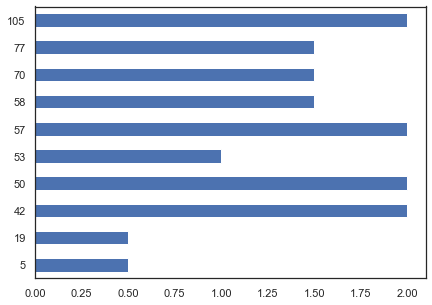

In [17]:
low_rated_movies['rating'].head(10).plot(kind='barh', figsize=(7,5));

**WordCloud**

We get a wordcloud view of movie titles.

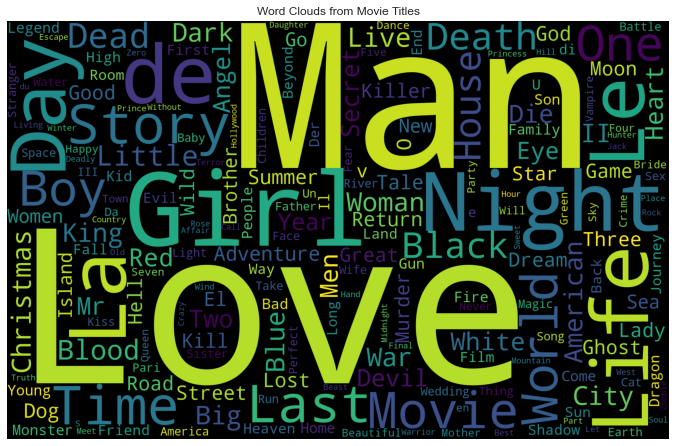

In [45]:
# Wordcloud of movie titles
movies_word = df_movies['title'] = df_movies['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'Black',
                            height = 1200,
                            width = 1900).generate(movies_wordcloud)
plt.figure(figsize = (12,6), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Word Clouds from Movie Titles')
plt.tight_layout(pad=0)
plt.show()

### 6.7 Budget by Genre

We get a view of the most expensive and least expensive movies to make by genre. Animation proves costly, while documentaries are frugal.

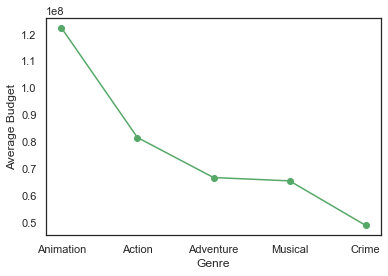

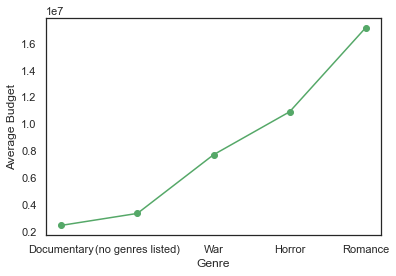

In [26]:
merged_movies = pd.merge(df_movies, df_imdb, on='movieId', how='left')

budget_graph = merged_movies[merged_movies['budget'].notna()]
budget_graph = budget_graph.replace(',','', regex=True)
budget_graph['budget3']=budget_graph.budget.str.extract('(\d+)')
budget_graph['genre'] = budget_graph['genres'].apply(lambda s:s.split('|')[0])


budget_graph['budget3'].astype(float).groupby(budget_graph['genre']).mean().sort_values(ascending=False)[:5].plot(xlabel='Genre', ylabel='Average Budget', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()
budget_graph['budget3'].astype(float).groupby(budget_graph['genre']).mean().sort_values(ascending=True)[:5].plot(xlabel='Genre', ylabel='Average Budget', 
                                                                            linestyle='-', marker='o', color='g')
plt.show()

## 7. Advanced Preprocessing

We revisit the data and perform some further preprocessing.

### 7.1 t-SNE Dimensionality Reduction

According to Wikipedia, the t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects have a high probability of being picked, whilst dissimilar points have an extremely small probability of being picked. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the map. Note that whilst the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this should be changed as appropriate.

In [16]:
# Subset the data to cut down computation time for now
df_genome_score = df_genome_scores[:10000000]

In [17]:
# Although scores are in the range of 0-1, there is no harm in scaling
scaler_mds = StandardScaler()
mds_genome = scaler_mds.fit_transform(df_genome_score.sample(frac=0.0001))

In [19]:
tsne = TSNE(3, n_jobs = -1,
            verbose = 2, 
            perplexity = 10, 
            learning_rate = 0.1,
            metric='euclidean',
            init='pca')

In [21]:
# fit data into the model
x_tsne = tsne.fit(mds_genome)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.134829
[t-SNE] Computed conditional probabilities in 0.021s
[t-SNE] Iteration 50: error = 70.4716721, gradient norm = 0.0475342 (50 iterations in 0.550s)
[t-SNE] Iteration 100: error = 69.9085693, gradient norm = 0.0244659 (50 iterations in 0.470s)
[t-SNE] Iteration 150: error = 69.2226257, gradient norm = 0.0171849 (50 iterations in 0.463s)
[t-SNE] Iteration 200: error = 68.5199051, gradient norm = 0.0122675 (50 iterations in 0.440s)
[t-SNE] Iteration 250: error = 67.8634033, gradient norm = 0.0084918 (50 iterations in 0.438s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.863403
[t-SNE] Iteration 300: error = 3.1244497, gradient norm = 0.0160373 (50 iterations in 0.409s)
[t-SNE] Iteration 350: error = 2.9903421, gradient norm = 0.01502

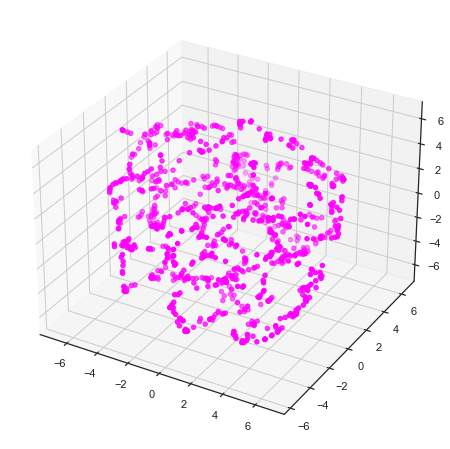

In [23]:
Axes3D

fig = plt.figure(figsize=(15, 8))

# Add 3D scatter plot
ax = fig.add_subplot(projection='3d')
ax.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], tsne.embedding_[:,2], color=['magenta'])
plt.show()

# 8.Model Selection & Evaluation

### Collaborative Filtering

This filtering strategy is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. It makes recommendations based on movies that those users rated.


In [ ]:
#Testing on entire dataset
train_df.drop('timestamp', axis=1, inplace=True)
train = df_train
reader = Reader(rating_scale=(train['rating'].min(), train['rating'].max()))
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

### SVD

In [ ]:
svd_test = SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)
svd_test.fit(trainset)
predictions = svd_test.test(testset)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

### Baseline

In [ ]:
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
blo_test.fit(trainset)
predictions = blo_test.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

### NMF

In [ ]:
nmf_test = NMF()
nmf_test.fit(trainset)
predictions = nmf_test.test(testset)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

### Co-clustering

In [ ]:
cc_test = CoClustering(random_state=42)
cc_test.fit(trainset)
predictions = cc_test.test(testset)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

### Content-Based Filtering

This filtering strategy is based on the data provided about the items. The algorithm recommends products that are similar to the ones that a user has liked in the past. This similarity (generally cosine similarity) is computed from the data we have about the items as well as the user’s past preferences. For example, if a user likes movies such as ''Grumpier Old Men' then we can recommend him movies with the genre 'Comedy' or maybe even movies directed by the same director.

In [ ]:
def data_preprocessing(subset_size):
    # Split genre data into individual words.
    movies['keyWords'] = movies['genres'].str.replace('|', ' ')
    # Subset of the data
    movies_subset = movies[:subset_size]
    return movies_subset
 
def content_model(movie_list,top_n=10): 

    # Initializing the empty list of recommended movies
    data = data_preprocessing(2000)
    # Instantiating and generating the count matrix
    count_vec = CountVectorizer()
    count_matrix = count_vec.fit_transform(data['keyWords'])
    indices = pd.Series(data['title'])
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    cosine_sim = pd.DataFrame(cosine_sim, index = data.index, columns = data.index)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)
    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(movies['title'])[i])
    return recommended_movies

In [ ]:
movies = movies_df.dropna()
movie_list = ['Grumpier Old Men (1995)','Ace Ventura: When Nature Calls (1995)','Father of the Bride Part II (1995)']
content_model(movie_list,top_n=10)

### Model Evaluation 

We built and tested six different collaborative filtering models and compared their performance using a statistical measure known as the root mean squared error (**RMSE**), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$  

In [ ]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(8, 5))
rmse_x = ['SVD','NormalPredictor','BaselineOnly','NMF','SlopeOne','CoClustering']
rmse_y = [svd_rmse,np_rmse,blo_rmse,nmf_rmse,slo_rmse,cc_rmse]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='brg',edgecolor='black')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),2), fontsize=12, ha="center", va='bottom')
    
plt.show()

### Cross Validation

Cross validation is a technique used to test the accuracy of a model's prediction on unseen data (validation sets). This is important because it can assist in picking up issues such as over/underfitting and selection bias. We used the K-fold technique to perform cross validation on our two best perfoming models, i.e. **SVD** and **BaselineOnly**.

In [ ]:
#SVD
svd_test = SVD(n_epochs = 40, n_factors = 200, init_std_dev = 0.05, random_state=42)
# Run 5-fold cross-validation and print results
a = cross_validate(svd_test, data, measures=['RMSE'], cv=5, verbose=True)

In [ ]:
#BASELINE
bsl_options = {'method': 'sgd','n_epochs': 40}
blo_test = BaselineOnly(bsl_options=bsl_options)
# Run 5-fold cross-validation and print results
b = cross_validate(blo_test, data, measures=['RMSE'], cv=5, verbose=True)

**Model Analysis**

In [ ]:
# Load the 100k dataset
train_subset = train_df[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

### Hyperparameter Tuning 

Hyperparameter tuning is the process by which a set of ideal hyperparameters are chosen for a model. A hyperparameter is a parameter for which the value is set manually and tuned to control the algorithm's learning process. We tested multiple parameters for our best performing model (i.e. **SVD**).

In [ ]:
param_grid = {'n_epochs':[40], #[30,40,50],
              'n_factors':[400], #[100,200,300,400],
              'init_std_dev':[0.005], #[0.001,0.005,0.05,0.1],
              'random_state':[42]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1)
grid_SVD.fit(data)
print('***Best score:***')
print(grid_SVD.best_score['rmse'])
print('***Best parameters:***')
print(grid_SVD.best_params['rmse'])

In [ ]:
# Predicted Target Values vs. Actual Target Values
new_df = pd.DataFrame(columns=['uid', 'iid', 'rating'])
i = 0
for (uid, iid, rating) in testset:
    new_df.loc[i] = [uid, iid, rating]
    i = i+1
true = new_df['rating']
pred = []
for i in predictions:
    pred.append(i.est)
fig,axis = plt.subplots(figsize=(8, 5))
sns.boxplot(x=true, y=pred, palette="brg")
plt.title("Predicted Target Values vs. Actual Target Values", fontsize=14)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.show()

# 9.Submission

In [ ]:

# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42, verbose=True)
svd.fit(trainset)

# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("Team_AE6_submission.csv", index=False)



# 10.Conclusion

### Outcome

We have succeeded in building a recommender system to reccomend movies to users based on their preferences. Our system can predict a users rating on a movie they have not rated before, with a reasonable amount of accuracy. Our model achieved an RMSE score of 0.78 on a test set hosted on Kaggle.

We used a singular-value-decomposition (SVD) algorithm , which is a collaborative filtering method. SVD makes use of a matrix where each row represents a user, and each column represents an item. Within this matrix are the ratings that are given to items by users [3].

### Future Recommendations

We believe our algorithm may be improved by a hybrid system, one that can deal with cold start problems better. However, this is an ongoing research topic in the data science field.

# References

[1] Google Developers. (n.d.). Collaborative Filtering Advantages & Disadvantages. [online] Available at: https://developers.google.com/machine-learning/recommendation/collaborative/summary.

[2] Dynamic Yield. (n.d.). The power of collaborative filtering. [online] Available at: https://www.dynamicyield.com/lesson/collaborative-filtering/.

[3] Kumar, D.V. (2020). Singular Value Decomposition (SVD) & Its Application In Recommender System. [online] Analytics India Magazine. Available at: https://analyticsindiamag.com/singular-value-decomposition-svd-application-recommender-system/#:~:text=In%20the%20context%20of%20the [Accessed 22 Jul. 2021].

